In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/CREDIT CARD/PS_20174392719_1491204439457_log.csv')

# DATASET DESCRIPTION

In [ ]:
data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
import pandas as pd


data = pd.read_csv('/content/drive/MyDrive/CREDIT CARD/PS_20174392719_1491204439457_log.csv')

# Get the number of rows and columns
num_rows, num_cols = data.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)


Number of rows: 6362620
Number of columns: 11


# FEATURE SELECTION BY STANDARD SCALER IN SKLEARN

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
data_replace = data.replace(to_replace=['PAYMENT','TRANSFER','CASH_OUT','DEBIT','CASH_IN'],value=[2,4,1,5,3],inplace=True)

In [ ]:
print(data )

         step  type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0           1     2     9839.64  C1231006815      170136.00       160296.36   
1           1     2     1864.28  C1666544295       21249.00        19384.72   
2           1     4      181.00  C1305486145         181.00            0.00   
3           1     1      181.00   C840083671         181.00            0.00   
4           1     2    11668.14  C2048537720       41554.00        29885.86   
...       ...   ...         ...          ...            ...             ...   
6362615   743     1   339682.13   C786484425      339682.13            0.00   
6362616   743     4  6311409.28  C1529008245     6311409.28            0.00   
6362617   743     1  6311409.28  C1162922333     6311409.28            0.00   
6362618   743     4   850002.52  C1685995037      850002.52            0.00   
6362619   743     1   850002.52  C1280323807      850002.52            0.00   

            nameDest  oldbalanceDest  newbalanceDes

In [ ]:
res=data.shape

print(res)

(6362620, 11)


In [ ]:
data.head()
data_replace = data.replace(to_replace=['PAYMENT','TRANSFER','CASH_OUT','DEBIT','CASH_IN'],value=[2,4,1,5,3],inplace=True)
print(data)

         step  type      amount  oldbalanceOrg  newbalanceOrig  \
0           1     2     9839.64      170136.00       160296.36   
1           1     2     1864.28       21249.00        19384.72   
2           1     4      181.00         181.00            0.00   
3           1     1      181.00         181.00            0.00   
4           1     2    11668.14       41554.00        29885.86   
...       ...   ...         ...            ...             ...   
6362615   743     1   339682.13      339682.13            0.00   
6362616   743     4  6311409.28     6311409.28            0.00   
6362617   743     1  6311409.28     6311409.28            0.00   
6362618   743     4   850002.52      850002.52            0.00   
6362619   743     1   850002.52      850002.52            0.00   

         oldbalanceDest  newbalanceDest  isFraud  
0                  0.00            0.00        0  
1                  0.00            0.00        0  
2                  0.00            0.00        1  
3  

In [ ]:
# Drop columns 'nameOrig', 'nameDest', and 'isFlaggedFraud'
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
data = data.drop(columns_to_drop, axis=1)

# DROPPING UNWANTED COLOUMNS USING PCA

Explained Variance Ratio: [0.33285982 0.28889446]


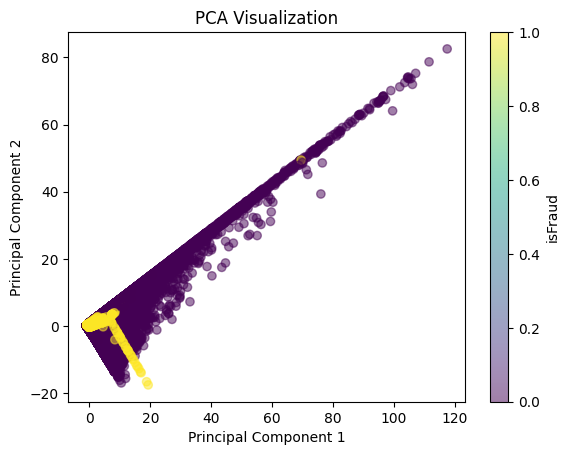

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler




# Drop any rows with missing values
data = data.dropna()

# Separate features from the target variable
X = data.drop('isFraud', axis=1)  # Features
y = data['isFraud']  # Target

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Visualize the reduced-dimensional data (optional)
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.colorbar(label='isFraud')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/CREDIT CARD/PS_20174392719_1491204439457_log.csv')
data_replace = data.replace(to_replace=['PAYMENT','TRANSFER','CASH_OUT','DEBIT','CASH_IN'],value=[2,4,1,5,3],inplace=True)
# Drop unnecessary columns
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
data = data.drop(columns_to_drop, axis=1)

# Drop any rows with missing values
data = data.dropna()

# Separate features from the target variable
X = data.drop('isFraud', axis=1)   # Features
y = data['isFraud']   # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# Train a classifier on the transformed data
# (e.g., logistic regression, support vector machine, etc.)
# For example, let's use Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_lda, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test_lda)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9990593497647196


In [ ]:

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=X.shape[1])  # Keep all components
X_pca = pca.fit_transform(X_scaled)

# Get eigenvalues and eigenvectors
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

# Print eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)


Eigenvalues:
[2.33001913e+00 2.02226153e+00 1.00326711e+00 9.69883979e-01
 6.66438505e-01 7.03508796e-03 1.09575694e-03]

Eigenvectors:
[[ 2.34447274e-02  2.55296935e-01  3.33430876e-01  3.69925884e-01
   3.70620717e-01  5.15193599e-01  5.32417459e-01]
 [ 3.33136224e-02 -1.92543065e-01  2.42068471e-01 -5.62199557e-01
  -5.63555091e-01  3.50320166e-01  3.83188367e-01]
 [ 9.19923122e-01  3.00301282e-01  1.78772139e-01 -5.80782162e-02
  -5.63195596e-02 -1.28193080e-01 -9.28583555e-02]
 [-3.89789434e-01  6.90413462e-01  4.83821119e-01 -1.58965029e-01
  -1.54491120e-01 -2.54997950e-01 -1.52148717e-01]
 [ 1.17248249e-02 -5.75043650e-01  7.38259415e-01  1.42478230e-01
   1.27335333e-01 -2.75633430e-01 -1.08038167e-01]
 [ 2.93073893e-03  1.23182460e-02 -1.38410172e-01  3.65628358e-02
  -2.57519871e-02 -6.73365569e-01  7.24748991e-01]
 [-3.64606291e-04  8.49094318e-03 -1.21652000e-04  7.04845126e-01
  -7.07904720e-01  3.16059932e-02 -3.15130692e-02]]


In [ ]:
import pandas as pd
import numpy as np



# Drop any rows with missing values
data = data.dropna()

# Compute the covariance matrix
covariance_matrix = np.cov(data, rowvar=False)

# Print the covariance matrix
print("Covariance Matrix:")
print(covariance_matrix)



Covariance Matrix:
[[ 2.02583900e+04  1.76289482e+00  1.92292158e+06 -4.13489144e+06
  -4.28631075e+06  1.33848331e+07  1.35381183e+07  1.61374022e-01]
 [ 1.76289482e+00  9.62158122e-01  1.17864503e+05  7.37780429e+05
   7.76329971e+05  2.20911008e+05  2.85112596e+05  5.69539503e-04]
 [ 1.92292158e+06  1.17864503e+05  3.64644764e+11 -4.81800215e+09
  -1.38801203e+10  6.03753263e+11  1.01903679e+12  1.66271305e+03]
 [-4.13489144e+06  7.37780429e+05 -4.81800215e+09  8.34194574e+12
   8.43525057e+12  6.50346161e+11  4.45998288e+11  1.05303148e+03]
 [-4.28631075e+06  7.76329971e+05 -1.38801203e+10  8.43525057e+12
   8.55005965e+12  6.74003600e+11  4.49474090e+11 -8.55454000e+02]
 [ 1.33848331e+07  2.20911008e+05  6.03753263e+11  6.50346161e+11
   6.74003600e+11  1.15544254e+13  1.21963895e+13 -7.18279794e+02]
 [ 1.35381183e+07  2.85112596e+05  1.01903679e+12  4.45998288e+11
   4.49474090e+11  1.21963895e+13  1.34992235e+13  7.06223713e+01]
 [ 1.61374022e-01  5.69539503e-04  1.66271305e+03 

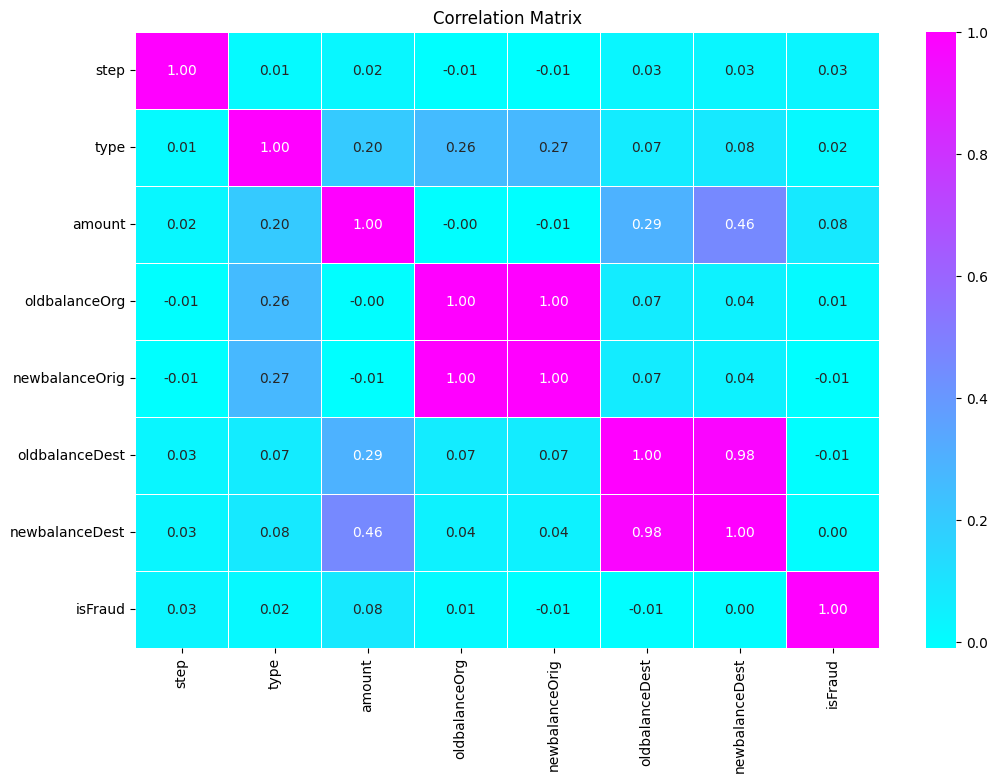

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Drop any rows with missing values
data = data.dropna()

# Compute the correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='cool', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# SELECTED FEATURES USING VARIANCE THRESHOLD

In [ ]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold


# Drop any rows with missing values
data = data.dropna()

# Separate features from the target variable
X = data.drop('isFraud', axis=1)  # Features
y = data['isFraud']  # Target

# Apply VarianceThreshold
threshold = 0.1  # Set the threshold as desired
selector = VarianceThreshold(threshold=threshold)
X_high_variance = selector.fit_transform(X)

# Get the indices of the selected features
selected_features = X.columns[selector.get_support()]

# Print the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest'],
      dtype='object')


In [ ]:
print(data)

         step  type      amount  oldbalanceOrg  newbalanceOrig  \
0           1     2     9839.64      170136.00       160296.36   
1           1     2     1864.28       21249.00        19384.72   
2           1     4      181.00         181.00            0.00   
3           1     1      181.00         181.00            0.00   
4           1     2    11668.14       41554.00        29885.86   
...       ...   ...         ...            ...             ...   
6362615   743     1   339682.13      339682.13            0.00   
6362616   743     4  6311409.28     6311409.28            0.00   
6362617   743     1  6311409.28     6311409.28            0.00   
6362618   743     4   850002.52      850002.52            0.00   
6362619   743     1   850002.52      850002.52            0.00   

         oldbalanceDest  newbalanceDest  isFraud  
0                  0.00            0.00        0  
1                  0.00            0.00        0  
2                  0.00            0.00        1  
3  

# SELECTED FEATURES USING LASSSO REGRESSION

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/CREDIT CARD/PS_20174392719_1491204439457_log.csv')
data_replace = data.replace(to_replace=['PAYMENT','TRANSFER','CASH_OUT','DEBIT','CASH_IN'],value=[2,4,1,5,3],inplace=True)

# Drop unnecessary columns
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
data = data.drop(columns_to_drop, axis=1)

# Drop any rows with missing values
data = data.dropna()

# Separate features from the target variable
X = data.drop('isFraud', axis=1)   # Features
y = data['isFraud']   # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Lasso regression model with alpha=0.001
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_scaled, y_train)

# Evaluate the model
train_mse = mean_squared_error(y_train, lasso.predict(X_train_scaled))
test_mse = mean_squared_error(y_test, lasso.predict(X_test_scaled))
print("Alpha: 0.001")
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

# Print selected features (non-zero coefficients)
selected_features = X.columns[lasso.coef_ != 0]
print("Selected Features:")
print(selected_features)


Alpha: 0.001
Train MSE: 0.00128642549677643
Test MSE: 0.00126547519666716
Selected Features:
Index(['step', 'amount'], dtype='object')


# LDA

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/CREDIT CARD/PS_20174392719_1491204439457_log.csv')
data_replace = data.replace(to_replace=['PAYMENT','TRANSFER','CASH_OUT','DEBIT','CASH_IN'],value=[2,4,1,5,3],inplace=True)
# Drop unnecessary columns
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
data = data.drop(columns_to_drop, axis=1)

# Drop any rows with missing values
data = data.dropna()

# Separate features from the target variable
X = data.drop('isFraud', axis=1)   # Features
y = data['isFraud']   # Target

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Linear Discriminant Analysis (LDA) for feature selection
lda = LinearDiscriminantAnalysis(n_components=1)  # Set the number of components to 1 for feature selection
X_lda = lda.fit_transform(X_scaled, y)

# Get the selected features
selected_features = X.columns[lda.coef_.argsort()[0][-1]]
print("Selected Feature:", selected_features)


Selected Feature: oldbalanceOrg


# STANDARD SCALER

In [ ]:
# Select the features
X = data.iloc[:, 1:]
sc = StandardScaler()
X = sc.fit_transform(X)
X.shape, X.min(), X.max()

((6362620, 7), -1.0758597628318074, 152.79358163840354)

# CHI-SQUARE METHOD

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/CREDIT CARD/PS_20174392719_1491204439457_log.csv')
data_replace = data.replace(to_replace=['PAYMENT','TRANSFER','CASH_OUT','DEBIT','CASH_IN'],value=[2,4,1,5,3],inplace=True)
# Drop unnecessary columns
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
data = data.drop(columns_to_drop, axis=1)

# Drop any rows with missing values
data = data.dropna()

# Separate features from the target variable
X = data.drop('isFraud', axis=1)   # Features
y = data['isFraud']   # Target

# Apply chi-square test for feature selection
selector = SelectKBest(score_func=chi2, k='all')  # Select all features
X_new = selector.fit_transform(X, y)

# Get the p-values and selected features
p_values = selector.pvalues_
selected_features = X.columns[selector.get_support()]

# Print p-values and selected features
for feature, p_value in zip(X.columns, p_values):
    print(f"Feature: {feature}, P-value: {p_value}")

print("Selected Features:")
print(selected_features)



Feature: step, P-value: 0.0
Feature: type, P-value: 2.0500294568007341e-171
Feature: amount, P-value: 0.0
Feature: oldbalanceOrg, P-value: 0.0
Feature: newbalanceOrig, P-value: 0.0
Feature: oldbalanceDest, P-value: 0.0
Feature: newbalanceDest, P-value: 0.0
Selected Features:
Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest'],
      dtype='object')


In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/CREDIT CARD/PS_20174392719_1491204439457_log.csv')
data_replace = data.replace(to_replace=['PAYMENT','TRANSFER','CASH_OUT','DEBIT','CASH_IN'],value=[2,4,1,5,3],inplace=True)

# RANDOM FOREST TREE CLASSIFIER

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Assuming your target variable (the one you want to predict) is named 'target'
X = data.drop('isFraud', axis=1)  # Features
y = data['isFraud']  # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Assuming your dataset is in a DataFrame named 'dataset'
# Extracting only the selected features
selected_features = ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
X_selected = data[selected_features]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Instantiate the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.9997013808776888


KeyboardInterrupt: 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()



import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv("/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv")
data_replace = data.replace(to_replace=['PAYMENT','TRANSFER','CASH_OUT','DEBIT','CASH_IN'],value=[2,4,1,5,3],inplace=True)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now X_train and X_test contain the features for training and testing, respectively
# y_train and y_test contain the corresponding target labels
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# Split the dataset into training and testing sets
x = data[['type','amount','oldbalanceOrg','newbalanceOrig']]
y = data.iloc[:,-2]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
model.fit(xtrain,ytrain)

NameError: name 'X' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()



import pandas as pd
from sklearn.model_selection import train_test_split



# Train Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

# Extract feature importance scores from Gradient Boosting
gb_feature_importances = gb_classifier.feature_importances_

# Plot feature importance scores
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 2)
plt.barh(X.columns, gb_feature_importances)
plt.xlabel('Feature Importance (Gradient Boosting)')
plt.ylabel('Feature')
plt.title('Feature Importance Scores (Gradient Boosting)')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Extract feature importance scores from Random Forest
rf_feature_importances = rf_classifier.feature_importances_

# Plot feature importance scores
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.barh(X.columns, rf_feature_importances)
plt.xlabel('Feature Importance (Random Forest)')
plt.ylabel('Feature')
plt.title('Feature Importance Scores (Random Forest)')

plt.tight_layout()
plt.show()


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
# Assuming your dataset is in a CSV file named 'dataset.csv'

# Load your dataset
dataset = pd.read_csv("/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv")
data_replace = data.replace(to_replace=['PAYMENT','TRANSFER','CASH_OUT','DEBIT','CASH_IN'],value=[2,4,1,5,3],inplace=True)
# Assuming your target variable (the one you want to predict) is named 'target'
X = dataset.drop('isFraud', axis=1)  # Features
y = dataset['isFraud']  # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
